# Préparation des données

## Import des librairies

In [147]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sn
import statistics as stats
import scipy as sc
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## CSV Train

### Import du CSV

In [148]:
df_train = pd.read_csv('csv/train.csv', header=0)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Etude des valeurs manquantes

In [149]:
df_train_len = len(df_train)
print('Taille du Dataset :',df_train_len)
for i in df_train.columns:
    s = pd.Series(df_train[i])
    nb = s.isna().sum()
    print(i, ' : ', nb, ' (', round(nb*100/df_train_len,1) ,'%)',sep='')

Taille du Dataset : 891
PassengerId : 0 (0.0%)
Survived : 0 (0.0%)
Pclass : 0 (0.0%)
Name : 0 (0.0%)
Sex : 0 (0.0%)
Age : 177 (19.9%)
SibSp : 0 (0.0%)
Parch : 0 (0.0%)
Ticket : 0 (0.0%)
Fare : 0 (0.0%)
Cabin : 687 (77.1%)
Embarked : 2 (0.2%)


### On efface la colonne Cabin qui a plus de 75% de valeurs vides

In [150]:
if 'Cabin' in df_train.columns:
    del df_train['Cabin']
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Après des questions en groupe, on a décider de comparer l'utilisation de la base de données en remplaçant les Ages manquant par la moyenne et si on supprime ces valeurs (différence de résultat entre lors du Machine Learning)

In [151]:
df_train = df_train.dropna(subset=['Embarked'])

df_train_mean = df_train
df_train_clean = df_train.dropna(subset=['Age'])

df_train_mean['Age'] = pd.Series(df_train['Age']).fillna(round(pd.Series(df_train['Age']).mean()))

In [152]:
df_train_mean_len = len(df_train_mean)
print('Taille du Dataset :',df_train_mean_len)
for i in df_train_mean.columns:
    s = pd.Series(df_train_mean[i])
    nb = s.isna().sum()
    print(i, ' : ', nb, ' (', round(nb*100/df_train_mean_len,1) ,'%)',sep='')

print("=====")

df_train_clean_len = len(df_train_clean)
print('Taille du Dataset :',df_train_clean_len)
for i in df_train_clean.columns:
    s = pd.Series(df_train_clean[i])
    nb = s.isna().sum()
    print(i, ' : ', nb, ' (', round(nb*100/df_train_clean_len,1) ,'%)',sep='')

Taille du Dataset : 889
PassengerId : 0 (0.0%)
Survived : 0 (0.0%)
Pclass : 0 (0.0%)
Name : 0 (0.0%)
Sex : 0 (0.0%)
Age : 0 (0.0%)
SibSp : 0 (0.0%)
Parch : 0 (0.0%)
Ticket : 0 (0.0%)
Fare : 0 (0.0%)
Embarked : 0 (0.0%)
=====
Taille du Dataset : 712
PassengerId : 0 (0.0%)
Survived : 0 (0.0%)
Pclass : 0 (0.0%)
Name : 0 (0.0%)
Sex : 0 (0.0%)
Age : 0 (0.0%)
SibSp : 0 (0.0%)
Parch : 0 (0.0%)
Ticket : 0 (0.0%)
Fare : 0 (0.0%)
Embarked : 0 (0.0%)


### Sauvegarde des fichiers dans des CSV pour des utilisations ulterieurs

In [153]:
df_train_clean.to_csv('csv/train_clean.csv',index=False)
df_train_mean.to_csv('csv/train_mean.csv',index=False)

### Matrices de correlations

In [154]:
df_train_clean_corr = df_train_clean.replace(['male','female','C','Q','S'],[1,0,0,1,2])
df_train_mean_corr = df_train_mean.replace(['male','female','C','Q','S'],[1,0,0,1,2])

CSV clean :

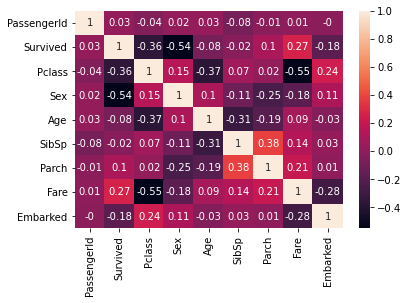

In [155]:
corrMatrixCln = round(df_train_clean_corr.corr(),2)
sn.heatmap(corrMatrixCln, annot=True)
plt.pyplot.show()

# Exploration de données

## DataVis

Voir le lien : https://app.powerbi.com/groups/4351951c-e70b-4b95-a88c-7cc80f4f485f/reports/e1a8205d-c883-4efe-ab86-638d60b07933/ReportSection

## Test d'Hypothèses

### Femme et enfant d'abord

H0 - Enfant pas en priorité  
H1 - Enfant en priorité

alpha - 0.05

On récupère les données des enfants (Age < 18) et de savoir si ils ont survécus (Survived = 1)

In [156]:
df_enfant = df_train_clean[['Survived','Age']]
df_enfant = df_enfant[df_enfant.Age < 18]

In [157]:
df_enfant_survivant = df_enfant[df_enfant.Survived == 1]

In [158]:
df_enfant['Age'].describe()

count    113.000000
mean       9.041327
std        6.030408
min        0.420000
25%        3.000000
50%        9.000000
75%       16.000000
max       17.000000
Name: Age, dtype: float64

In [159]:
df_enfant_survivant['Age'].describe()

count    61.000000
mean      7.888033
std       6.129831
min       0.420000
25%       3.000000
50%       5.000000
75%      15.000000
max      17.000000
Name: Age, dtype: float64

In [206]:
child_adventage = sc.stats.chisquare(df_child_advantage['Enfant'],f_exp=df_child_advantage['Adulte'])
child_adventage

Power_divergenceResult(statistic=396.66088768888255, pvalue=2.9364658665480563e-88)

In [194]:
nb_passager = len(df_train_clean)
print('Passager :', nb_passager)
nb_child = len(df_enfant)
print('Enfant :', nb_child)
nb_adult = nb_passager-nb_child
print('Adulte :', nb_adult)
nb_alive = len(df_train_clean[df_train_clean.Survived == 1])
print('Survivant :', nb_alive)
nb_alive_child = len(df_enfant_survivant)
print('Enfant Survivant :', nb_alive_child)
nb_alive_adult = nb_alive - nb_alive_child
print('Adulte Survivant :', nb_alive_adult)
nb_died = nb_passager - nb_alive
print('Mort :', nb_died)
nb_died_child = nb_child - nb_alive_child
print('Enfant Mort :', nb_died_child)
nb_died_adult = nb_adult - nb_alive_adult
print('Adulte Mort :', nb_died_adult)

Passager : 712
Enfant : 113
Adulte : 599
Survivant : 288
Enfant Survivant : 61
Adulte Survivant : 227
Mort : 424
Enfant Mort : 52
Adulte Mort : 372


In [205]:
df_child_advantage = pd.DataFrame(data=np.array([[nb_alive_child,nb_alive_adult],[nb_died_child,nb_died_adult]]),columns=['Enfant','Adulte'],index=['Vivant','Mort'])
df_child_advantage

,Enfant,Adulte
Vivant,61,227
Mort,52,372


# Machine Learning

Je suis conscient qu'il y a une erreur sur mon test de Khi2, je travaillerai dessus si le projet m'en laisse le temps ou lorsque le projet sera terminer, pendant les vacances

## Régression Linéaire

### Avec feature individuelle : age (X1)

In [160]:
df_Y = pd.DataFrame(df_train_clean['Survived'], columns=['Survived'])
df_Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [161]:
df_X1 = pd.DataFrame(df_train_clean['Age'], columns=['Age'])
df_X1

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [162]:
len_test = (len(df_X1)*20)//100
len_test

142

In [163]:
df_X1_train = df_X1[:-len_test]
df_X1_test = df_X1[-len_test:]
print(len(df_X1_train),'-', len(df_X1_test))

570 - 142


In [164]:
df_Y_train = df_Y[:-len_test]
df_Y_test = df_Y[-len_test:]
print(len(df_Y_train),'-', len(df_Y_test))

570 - 142


In [165]:
regrX1 = linear_model.LinearRegression()

In [166]:
regrX1.fit(df_X1_train, df_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
df_Y1_pred = regrX1.predict(df_X1_test)

In [168]:
print('Coeficients : \n', regrX1.coef_)

Coeficients : 
 [[-0.00283428]]


In [169]:
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y1_pred),2))

Mean squared error:  0.24


In [170]:
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y1_pred))

Coefficient of determination:  0.0035033557843706653


### Avec feature individuelle : sexe (X2)

In [171]:
df_X2 = pd.DataFrame(df_train_clean['Sex'], columns=['Sex']).replace(['male','female'],[1,0])
df_X2

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [172]:
df_X2_train = df_X2[:-len_test]
df_X2_test = df_X2[-len_test:]
print(len(df_X2_train),'-', len(df_X2_test))
print(len(df_Y_train), '-', len(df_Y_test))

570 - 142
570 - 142


In [173]:
regrX2 = linear_model.LinearRegression()
regrX2.fit(df_X2_train, df_Y_train)
df_Y2_pred = regrX2.predict(df_X2_test)
print('Coeficients : \n', regrX2.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y2_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y2_pred))

Coeficients : 
 [[-0.54066986]]
Mean squared error:  0.16
Coefficient of determination:  0.31615818177560095


### Avec feature individuelle : class (X3)

In [174]:
df_X3 = pd.DataFrame(df_train_clean['Pclass'], columns=['Pclass'])
df_X3

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
885,3
886,2
887,1
889,1


In [175]:
df_X3_train = df_X3[:-len_test]
df_X3_test = df_X3[-len_test:]
print(len(df_X3_train),'-', len(df_X3_test))
print(len(df_Y_train), '-', len(df_Y_test))

570 - 142
570 - 142


In [176]:
regrX3 = linear_model.LinearRegression()
regrX3.fit(df_X3_train, df_Y_train)
df_Y3_pred = regrX3.predict(df_X3_test)
print('Coeficients : \n', regrX3.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y3_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y3_pred))

Coeficients : 
 [[-0.20341028]]
Mean squared error:  0.2
Coefficient of determination:  0.15018417212888402


### Avec feature individuelle : fare (X4)

In [177]:
df_X4 = pd.DataFrame(df_train_clean['Fare'], columns=['Fare'])
df_X4

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
885,29.1250
886,13.0000
887,30.0000
889,30.0000


In [178]:
df_X4_train = df_X4[:-len_test]
df_X4_test = df_X4[-len_test:]
print(len(df_X4_train),'-', len(df_X4_test))
print(len(df_Y_train), '-', len(df_Y_test))

570 - 142
570 - 142


In [179]:
regrX4 = linear_model.LinearRegression()
regrX4.fit(df_X4_train, df_Y_train)
df_Y4_pred = regrX4.predict(df_X4_test)
print('Coeficients : \n', regrX4.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y4_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y4_pred))

Coeficients : 
 [[0.00233375]]
Mean squared error:  0.21
Coefficient of determination:  0.1087913473904385


### Avec les 4 features : age, sex, class, fare (X5)

In [180]:
df_X5 = pd.DataFrame(df_train_clean[['Age','Sex','Pclass','Fare']], columns=['Age','Sex','Pclass','Fare']).replace(['male','female'],[1,0])
df_X5

,Age,Sex,Pclass,Fare
0,22.0,1,3,7.2500
1,38.0,0,1,71.2833
2,26.0,0,3,7.9250
3,35.0,0,1,53.1000
4,35.0,1,3,8.0500
...,...,...,...,...
885,39.0,0,3,29.1250
886,27.0,1,2,13.0000
887,19.0,0,1,30.0000
889,26.0,1,1,30.0000


In [181]:
df_X5_train = df_X5[:-len_test]
df_X5_test = df_X5[-len_test:]
print(len(df_X5_train),'-', len(df_X5_test))
print(len(df_Y_train), '-', len(df_Y_test))

570 - 142
570 - 142


In [182]:
regrX5 = linear_model.LinearRegression()
regrX5.fit(df_X5_train, df_Y_train)
df_Y5_pred = regrX5.predict(df_X5_test)
print('Coeficients : \n', regrX5.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y5_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y5_pred))

Coeficients : 
 [[-4.94834576e-03 -4.78074549e-01 -2.12330578e-01 -3.03453609e-04]]
Mean squared error:  0.14
Coefficient of determination:  0.4161369083289873


### Avec des combinaisons features : age, sex (X6)

In [183]:
df_X6 = pd.DataFrame(df_train_clean[['Age','Sex']], columns=['Age','Sex']).replace(['male','female'],[1,0])
df_X6_train = df_X6[:-len_test]
df_X6_test = df_X6[-len_test:]
print(len(df_X6_train),'-', len(df_X6_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX6 = linear_model.LinearRegression()
regrX6.fit(df_X6_train, df_Y_train)
df_Y6_pred = regrX6.predict(df_X6_test)
print('Coeficients : \n', regrX6.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y6_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y6_pred))

570 - 142
570 - 142
Coeficients : 
 [[-1.34083359e-04 -5.40056006e-01]]
Mean squared error:  0.16
Coefficient of determination:  0.3171739916853883


### Avec des combinaisons features : age, pclass (X7)

In [184]:
df_X7 = pd.DataFrame(df_train_clean[['Age','Pclass']], columns=['Age','Pclass'])
df_X7_train = df_X7[:-len_test]
df_X7_test = df_X7[-len_test:]
print(len(df_X7_train),'-', len(df_X7_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX7 = linear_model.LinearRegression()
regrX7.fit(df_X7_train, df_Y_train)
df_Y7_pred = regrX7.predict(df_X7_test)
print('Coeficients : \n', regrX7.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y7_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y7_pred))

570 - 142
570 - 142
Coeficients : 
 [[-0.00841281 -0.25813036]]
Mean squared error:  0.19
Coefficient of determination:  0.19764495253609782


### Avec des combinaisons features : age, fare (X8)

In [185]:
df_X8 = pd.DataFrame(df_train_clean[['Age','Fare']], columns=['Age','Fare'])
df_X8_train = df_X8[:-len_test]
df_X8_test = df_X8[-len_test:]
print(len(df_X8_train),'-', len(df_X8_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX8 = linear_model.LinearRegression()
regrX8.fit(df_X8_train, df_Y_train)
df_Y8_pred = regrX8.predict(df_X8_test)
print('Coeficients : \n', regrX8.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y8_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y8_pred))

570 - 142
570 - 142
Coeficients : 
 [[-0.00350451  0.00241046]]
Mean squared error:  0.21
Coefficient of determination:  0.1234024754613321


### Avec des combinaisons features : sex, pclass (X9)

In [186]:
df_X9 = pd.DataFrame(df_train_clean[['Sex','Pclass']], columns=['Sex','Pclass']).replace(['male','female'],[1,0])
df_X9_train = df_X9[:-len_test]
df_X9_test = df_X9[-len_test:]
print(len(df_X9_train),'-', len(df_X9_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX9 = linear_model.LinearRegression()
regrX9.fit(df_X9_train, df_Y_train)
df_Y9_pred = regrX9.predict(df_X9_test)
print('Coeficients : \n', regrX9.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y9_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y9_pred))

570 - 142
570 - 142
Coeficients : 
 [[-0.50449439 -0.16762286]]
Mean squared error:  0.15
Coefficient of determination:  0.3811405180381554


### Avec des combinaisons features : sex, fare (X10)

In [187]:
df_X10 = pd.DataFrame(df_train_clean[['Sex','Fare']], columns=['Sex','Fare']).replace(['male','female'],[1,0])
df_X10_train = df_X10[:-len_test]
df_X10_test = df_X10[-len_test:]
print(len(df_X10_train),'-', len(df_X10_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX10 = linear_model.LinearRegression()
regrX10.fit(df_X10_train, df_Y_train)
df_Y10_pred = regrX10.predict(df_X10_test)
print('Coeficients : \n', regrX10.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y10_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y10_pred))

570 - 142
570 - 142
Coeficients : 
 [[-0.51196921  0.00148044]]
Mean squared error:  0.15
Coefficient of determination:  0.3672859756161706


### Avec des combinaisons features : pclass, fare (X11)

In [188]:
df_X11 = pd.DataFrame(df_train_clean[['Pclass','Fare']], columns=['Pclass','Fare'])
df_X11_train = df_X11[:-len_test]
df_X11_test = df_X11[-len_test:]
print(len(df_X11_train),'-', len(df_X11_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX11 = linear_model.LinearRegression()
regrX11.fit(df_X11_train, df_Y_train)
df_Y11_pred = regrX11.predict(df_X11_test)
print('Coeficients : \n', regrX11.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y11_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y11_pred))

570 - 142
570 - 142
Coeficients : 
 [[-0.17924491  0.0006887 ]]
Mean squared error:  0.2
Coefficient of determination:  0.16815889799995276


### Avec des combinaisons features : age, sex, pclass (X12)

In [189]:
df_X12 = pd.DataFrame(df_train_clean[['Age','Sex','Pclass']], columns=['Age','Sex','Pclass']).replace(['male','female'],[1,0])
df_X12_train = df_X12[:-len_test]
df_X12_test = df_X12[-len_test:]
print(len(df_X12_train),'-', len(df_X12_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX12 = linear_model.LinearRegression()
regrX12.fit(df_X12_train, df_Y_train)
df_Y12_pred = regrX12.predict(df_X12_test)
print('Coeficients : \n', regrX12.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y12_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y12_pred))

570 - 142
570 - 142
Coeficients : 
 [[-0.00479958 -0.47533757 -0.20090941]]
Mean squared error:  0.14
Coefficient of determination:  0.4240423820945628


### Avec des combinaisons features : age, sex, fare (X13)

In [190]:
df_X13 = pd.DataFrame(df_train_clean[['Age','Sex','Fare']], columns=['Age','Sex','Fare']).replace(['male','female'],[1,0])
df_X13_train = df_X13[:-len_test]
df_X13_test = df_X13[-len_test:]
print(len(df_X13_train),'-', len(df_X13_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX13 = linear_model.LinearRegression()
regrX13.fit(df_X13_train, df_Y_train)
df_Y13_pred = regrX13.predict(df_X13_test)
print('Coeficients : \n', regrX13.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y13_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y13_pred))

570 - 142
570 - 142
Coeficients : 
 [[-0.00071054 -0.50829605  0.00150212]]
Mean squared error:  0.15
Coefficient of determination:  0.3736209854242455


### Avec des combinaisons features : age, class, fare (X14)

In [191]:
df_X14 = pd.DataFrame(df_train_clean[['Age','Pclass','Fare']], columns=['Age','Pclass','Fare'])
df_X14_train = df_X14[:-len_test]
df_X14_test = df_X14[-len_test:]
print(len(df_X14_train),'-', len(df_X14_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX14 = linear_model.LinearRegression()
regrX14.fit(df_X14_train, df_Y_train)
df_Y14_pred = regrX14.predict(df_X14_test)
print('Coeficients : \n', regrX14.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y14_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y14_pred))

570 - 142
570 - 142
Coeficients : 
 [[-8.28617271e-03 -2.49354584e-01  2.26629407e-04]]
Mean squared error:  0.19
Coefficient of determination:  0.2045443432161469


In [192]:
df_X15 = pd.DataFrame(df_train_clean[['Pclass','Sex','Fare']], columns=['Pclass','Sex','Fare']).replace(['male','female'],[1,0])
df_X15_train = df_X15[:-len_test]
df_X15_test = df_X15[-len_test:]
print(len(df_X15_train),'-', len(df_X15_test))
print(len(df_Y_train), '-', len(df_Y_test))
regrX15 = linear_model.LinearRegression()
regrX15.fit(df_X15_train, df_Y_train)
df_Y15_pred = regrX15.predict(df_X15_test)
print('Coeficients : \n', regrX15.coef_)
print('Mean squared error: ', round(mean_squared_error(df_Y_test,df_Y15_pred),2))
print('Coefficient of determination: ', r2_score(df_Y_test,df_Y15_pred))

570 - 142
570 - 142
Coeficients : 
 [[-1.69962001e-01 -5.05314083e-01 -6.83215803e-05]]
Mean squared error:  0.15
Coefficient of determination:  0.37930505268915216


### Avec des combinaisons features : sex, class, fare (X15)

### Avec des corrélations fortes

Pour l'analyse avec les corrélations fortes, si l'on se base sur les valeurs supérieurs à 0.5, on a 'pclass' et 'sex'. La régression linéaire a déjà été faite en (X9)   
Pour l'analyse avec les corrélations fortes, si l'on se base sur les valeurs supérieurs à 0.2, on a 'pclass','sex' et 'fare'. La régression linéaire a déjà été faite en (X15)